In [1]:
import pandas as pd
from sql_functions import create_db_connection, execute_query, read_query
import plotly.express as px 
import plotly.graph_objects as go

#connect to database
pw = "*****"
connection = create_db_connection("localhost", "root", pw, "usports")

MySQL Database connection successful


### Individual 3 point attempts
Find the number of players each season who played in at least 1 game and played at least 5 minutes per game

Find the number of players each season who took >= X 3 point attempts per game (and who played in at least 1 game and played at least 5 minutes per game). Normalize this value by the number of players who played in at least 1 game and played at least 5 minutes per game so that results aren't skewed by increasing number of playeres in league.

Visualize as multiple line plots on a single axes


In [2]:
#count number of players who took greater than X threes each season
for num_threes in range(0,9):
    #count the number of players in each season who meet criteria above and also took at least num_threes 3pt shots per game
    if num_threes == 0:
        q = """
        SELECT season, count(name)
        FROM players
        NATURAL JOIN player_shooting
        NATURAL JOIN player_info
        WHERE games_played > 0 AND minutes_pgame >= 5 AND fga3 >= 0 AND fga3 < 1
        GROUP BY season
        ORDER BY season;
        """
        result_threes = read_query(connection, q, None)
    else:
        q = """
            SELECT season, count(name)
            FROM players
            NATURAL JOIN player_shooting
            NATURAL JOIN player_info
            WHERE games_played > 0 AND minutes_pgame >= 5 AND fga3 >= %s
            GROUP BY season
            ORDER BY season;
            """
        result_threes = read_query(connection, q, [num_threes])
        
    new_df = pd.DataFrame(result_threes, columns=['Season', num_threes])
    if num_threes == 0:
       df = new_df
    if num_threes > 0:
       df = df.join(new_df.set_index('Season'), on='Season', how='left')
    
#count number of players who played in at least 1 game and averaged at least 5 minutes per game
q2 = """
    SELECT season, count(name)
    FROM players
    NATURAL JOIN player_info
    WHERE games_played > 0 AND minutes_pgame >= 5
    GROUP BY season
    ORDER BY season;
    """

result_players = read_query(connection, q2, None)
df_numPlayers = pd.DataFrame(result_players, columns=['Season', 'Count'])

three_count_norm = df[[0,1,2,3,4,5,6,7,8]].transpose()/df_numPlayers['Count'].values
three_count_norm.columns = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023]

/Users/emmaritcey/Documents/basketball_research/usports_database/.venv/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning: plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.

  warnings.warn(


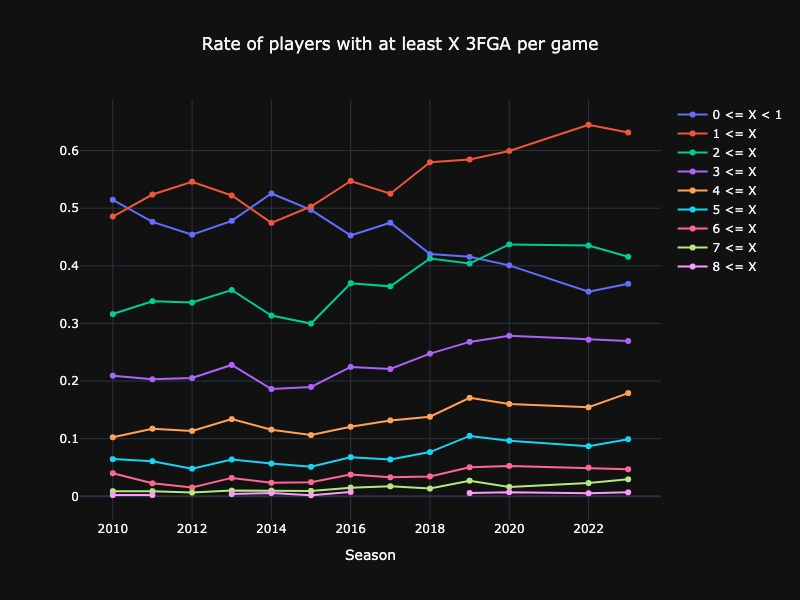

In [3]:

plot = go.Figure(data=[
    go.Line(
    name = '0 <= X < 1',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[0]
    ),
    go.Line(
    name = '1 <= X',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[1]
    ),
    go.Line(
    name = '2 <= X',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[2]
    ),
    go.Line(
    name = '3 <= X',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[3]
    ),
    go.Line(
    name = '4 <= X',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[4]
    ),
    go.Line(
    name = '5 <= X',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[5]
    ),
    go.Line(
    name = '6 <= X',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[6]
    ),
    go.Line(
    name = '7 <= X',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[7]
    ),
    go.Line(
    name = '8 <= X',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[8]
    )],
    layout=go.Layout(
        title="Rate of players with at least X 3FGA per game",
        xaxis_title="Season",
        template="plotly_dark",
        width=800,
        height=600             
                 )
)

plot.update_layout(title_x=0.5)

plot.show('jpg') #jpg so that image can be viewed in notebook in github

#save Figure as jpg image
plot.write_image("images/ind_3fga_by_season.jpeg", scale=6)

Findings from above:
- number of players taking less than 1 3pt attempt per game as decreased steadily since 2014
- number of players taking >= 1, 2, or 3 3 pt attempts per game has increased since 2014/2015 but plateaued/dipped the last two seasons
- number of players taking >= 4 or >=5 3's per game increased between 2015 and 2019, then plateaued/decreased before increasing again in 2023 season. Likely plateaued because more players are taking threes so they are spread out more between players, then in 2023 les players taking at least 1 or 2 3's per game and more are taking at least 4 or 5 per game

#### Do same thing but with exclusive ranges


/Users/emmaritcey/Documents/basketball_research/usports_database/.venv/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




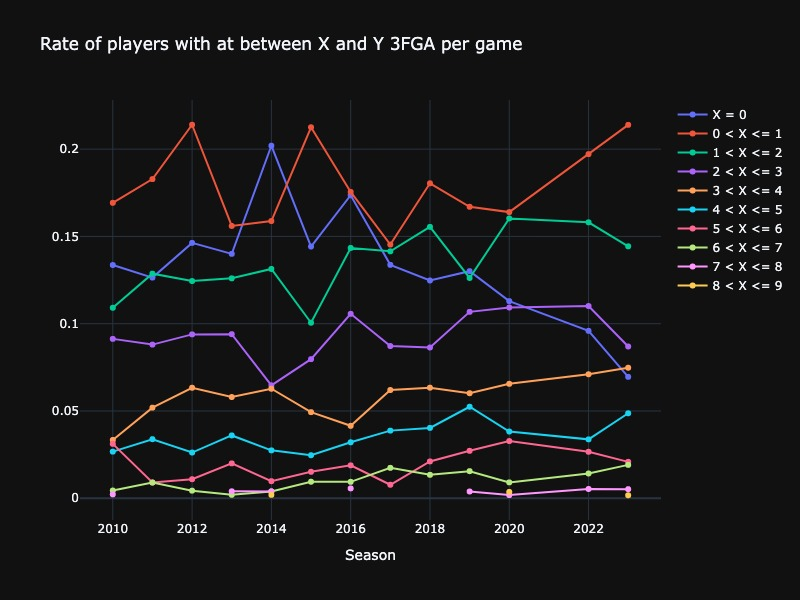

In [4]:

#count number of players who took greater than X threes each season
for num_threes in range(0,10):
    #count the number of players in each season who meet criteria above and also took at least num_threes 3pt shots per game
    if num_threes == 0:
        q = """
        SELECT season, count(name)
        FROM players
        NATURAL JOIN player_shooting
        NATURAL JOIN player_info
        WHERE games_played > 0 AND minutes_pgame >= 5 AND fga3 = 0
        GROUP BY season
        ORDER BY season;
        """
        result_threes = read_query(connection, q, None)
    
    else:
        q = """
            SELECT season, count(name)
            FROM players
            NATURAL JOIN player_shooting
            NATURAL JOIN player_info
            WHERE games_played > 0 AND minutes_pgame >= 5 AND fga3 > %s AND fga3 <= %s
            GROUP BY season
            ORDER BY season;
            """
        
        result_threes = read_query(connection, q, [num_threes, num_threes+1])
        
    new_df = pd.DataFrame(result_threes, columns=['Season', num_threes])
    if num_threes == 0:
       df = new_df
    if num_threes > 0:
       df = df.join(new_df.set_index('Season'), on='Season', how='left')
       
    
#count number of players who played in at least 1 game and averaged at least 5 minutes per game
q2 = """
    SELECT season, count(name)
    FROM players
    NATURAL JOIN player_info
    WHERE games_played > 0 AND minutes_pgame >= 5
    GROUP BY season
    ORDER BY season;
    """

result_players = read_query(connection, q2, None)
df_numPlayers = pd.DataFrame(result_players, columns=['Season', 'Count'])

three_count_norm = df[[0,1,2,3,4,5,6,7,8,9]].transpose()/df_numPlayers['Count'].values
three_count_norm.columns = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023]

plot = go.Figure(data=[
    go.Line(
    name = 'X = 0',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[0]
    ),
    go.Line(
    name = '0 < X <= 1',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[1]
    ),
    go.Line(
    name = '1 < X <= 2',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[2]
    ),
    go.Line(
    name = '2 < X <= 3',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[3]
    ),
    go.Line(
    name = '3 < X <= 4',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[4]
    ),
    go.Line(
    name = '4 < X <= 5',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[5]
    ),
    go.Line(
    name = '5 < X <= 6',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[6]
    ),
    go.Line(
    name = '6 < X <= 7',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[7]
    ),
    go.Line(
    name = '7 < X <= 8',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[8]
    ),
    go.Line(
    name = '8 < X <= 9',
    x = three_count_norm.columns.values,
    y = three_count_norm.iloc[9]
    )],
    layout=go.Layout(
        title="Rate of players with at between X and Y 3FGA per game",
        xaxis_title="Season",
        template="plotly_dark",
        width=800,
        height=600             
                 ))
plot.show('jpg')
#save Figure as jpg image
plot.write_image("images/ind_3fga_by_season_excRanges.jpeg", scale=6)


Findings from above:
- number of players taking zero 3's per game has decreased almost every year since 2014 (rate of ~0.07 compared to 0.2 in 2014) and was the lowest it's ever been (for what we have data for)
- number of players taking between 0 and 1 has varied but increased in each of the last two seasons
- number of players taking between 1 and 2 has been higher in 6 of the last 7 seasons compared to from 2010-2015
- number of players taking between 3 and 4 has increased in each of the last 3 seasons and in 2023 was the highest its ever been (for what we have data for) - a rate of ~0.075 compared to ~0.033
- number of players taking between 1 and 3 threes decreased a lot in 2023. This correlates with an increase in players shooting between 4 and 5 per game and increase in players shooting between 0 and 1 per game 
- number of players shooting between 8 and 9 per game doesn't seem to have changed much, but the rate of players in 2023 is approx 0.019 compared to 0.004 in 2020 (almost 5x as common)

### Individual 3 point field goal percentage
- Find the number of players who shot 3 point attempts with an accuracy between X% and Y% who played in at least 1 game and averaged at least 5 minutes per game
- Normalize by the number of players who played in at least 1 game and averaged at least 5 minutes per game


In [5]:
pcts = [0, 15, 20, 25, 30, 35, 40, 45, 50]

for idx in range(0,len(pcts)-1):
    lower_bound = pcts[idx]
    upper_bound = pcts[idx+1]
    
    q = """
        SELECT season, count(player_id)
        FROM player_shooting
        NATURAL JOIN player_info
        WHERE fg3_percent >= %s AND fg3_percent < %s AND games_played > 0 AND minutes_pgame >= 5
        GROUP BY season
        ORDER BY season
        """
    result = read_query(connection, q,[lower_bound, upper_bound])
    
    new_df = pd.DataFrame(result, columns=['Season', lower_bound])
    if lower_bound == 0:
       df = new_df
    if lower_bound != 0:
       df = df.join(new_df.set_index('Season'), on='Season', how='left')
     
     
#count number of players who played in at least 1 game and averaged at least 5 minutes per game
q2 = """
    SELECT season, count(player_id)
    FROM player_info
    WHERE games_played > 0 AND minutes_pgame >= 5
    GROUP BY season
    ORDER BY season;
    """

result_players = read_query(connection, q2, None)
df_numPlayers = pd.DataFrame(result_players, columns=['Season', 'Count'])

three_pct_norm = df[[0, 15, 20, 25, 30, 35, 40, 45]].transpose()/df_numPlayers['Count'].values
three_pct_norm.columns = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023]

/Users/emmaritcey/Documents/basketball_research/usports_database/.venv/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




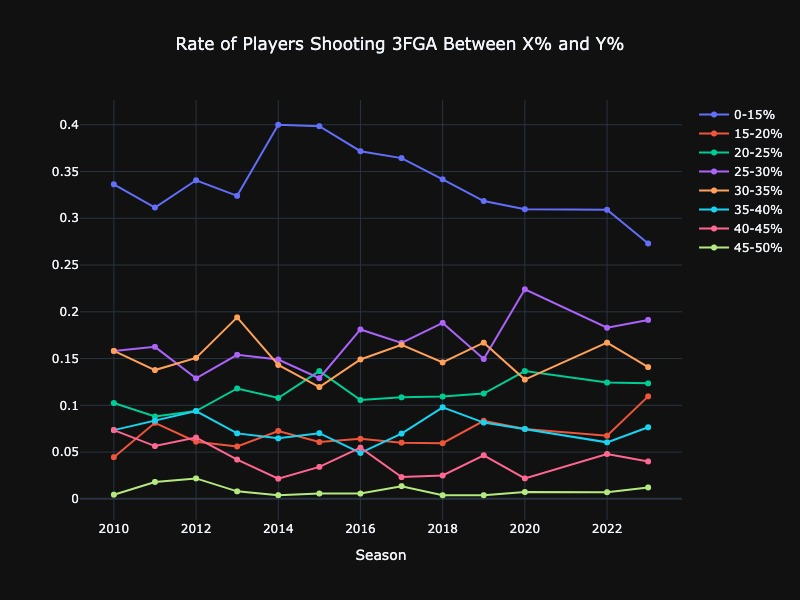

In [6]:
plot = go.Figure(data=[
    go.Line(
    name = '0-15%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[0]
    ),
    go.Line(
    name = '15-20%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[1]
    ),
    go.Line(
    name = '20-25%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[2]
    ),
    go.Line(
    name = '25-30%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[3]
    ),
    go.Line(
    name = '30-35%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[4]
    ),
    go.Line(
    name = '35-40%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[5]
    ),
    go.Line(
    name = '40-45%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[6]
    ),
    go.Line(
    name = '45-50%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[7]
    )],
    layout=go.Layout(
        title="Rate of Players Shooting 3FGA Between X% and Y%",
        xaxis_title="Season",
        template="plotly_dark",
        width=800,
        height=600            
                 )
    )
plot.update_layout(title_x=0.5)

plot.show('jpg')

#save Figure as jpg image
plot.write_image("images/ind_3fg_pct_by_season.jpeg", scale=6)

#### Key Findings from above:
- number of players shooting between 0% and 15 % has decreased 2014 and in 2023 was loweset it's ever been (for what we have data for) - rate of ~0.27 compared to 0.4 in 2014
- number of players shooting between 25% and 30% has slightly increased since 2015
- more players are shooting more 3's but overall, across the league the 3pt% hasn't changed much/no consistent trends here - the main takeaway is that there are much fewer "very poor" 3 point shooters, even though there may not be significantly more "very good" 3 point shooters, more players are shooting in a range where teams may respect their shot more

#### Now same thing but only looking at players who take at least 2 3FGA per game

In [7]:
pcts = [0, 15, 20, 25, 30, 35, 40, 45, 50]

for idx in range(0,len(pcts)-1):
    lower_bound = pcts[idx]
    upper_bound = pcts[idx+1]
    
    q = """
        SELECT season, count(player_id)
        FROM player_shooting
        NATURAL JOIN player_info
        WHERE fg3_percent >= %s AND fg3_percent < %s AND fga3 >= 2 AND games_played > 0 AND minutes_pgame >= 5
        GROUP BY season
        ORDER BY season
        """
    result = read_query(connection, q,[lower_bound, upper_bound])
    
    new_df = pd.DataFrame(result, columns=['Season', lower_bound])

    if lower_bound == 0:
       df = new_df
    if lower_bound != 0:
       df = df.join(new_df.set_index('Season'), on='Season', how='outer')
     
     
#count number of players who took at least 2 3 point attempts per game and played in at least 1 game and averaged at least 5 minutes per game
q2 = """
    SELECT season, count(player_id)
    FROM player_info
    NATURAL JOIN player_shooting
    WHERE fga3 >= 2 AND games_played > 0 AND minutes_pgame >= 5
    GROUP BY season
    ORDER BY season;
    """

result_players = read_query(connection, q2, None)
df_numPlayers = pd.DataFrame(result_players, columns=['Season', 'Count'])



/Users/emmaritcey/Documents/basketball_research/usports_database/.venv/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




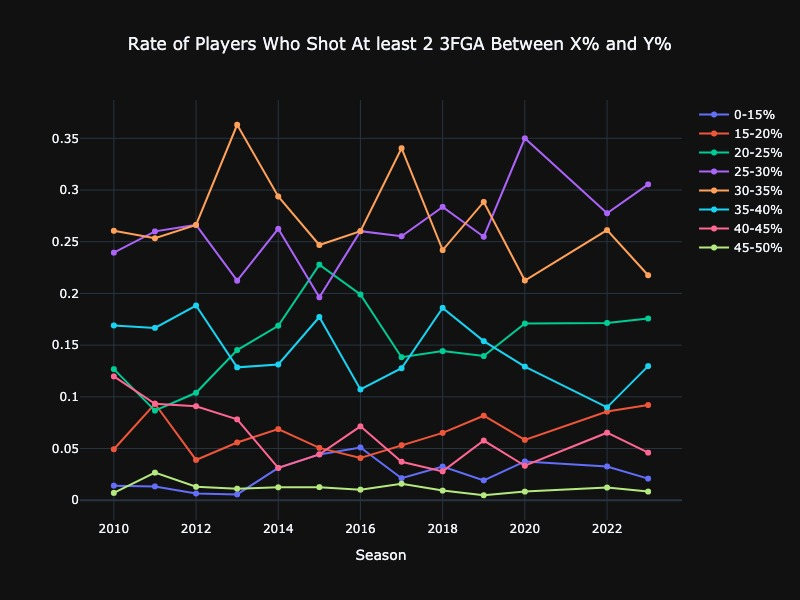

In [8]:
three_pct_norm = df[[0, 15, 20, 25, 30, 35, 40, 45]].transpose()/df_numPlayers['Count'].values
three_pct_norm.columns = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023]

plot = go.Figure(data=[
    go.Line(
    name = '0-15%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[0]
    ),
    go.Line(
    name = '15-20%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[1]
    ),
    go.Line(
    name = '20-25%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[2]
    ),
    go.Line(
    name = '25-30%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[3]
    ),
    go.Line(
    name = '30-35%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[4]
    ),
    go.Line(
    name = '35-40%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[5]
    ),
    go.Line(
    name = '40-45%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[6]
    ),
    go.Line(
    name = '45-50%',
    x = three_pct_norm.columns.values,
    y = three_pct_norm.iloc[7]
    )],
    layout=go.Layout(
        title="Rate of Players Who Shot At least 2 3FGA Between X% and Y%",
        xaxis_title="Season",
        template="plotly_dark",
        width=800,
        height=600            
                 )
    )
plot.update_layout(title_x=0.5)

plot.show('jpg')

#save Figure as jpg image
plot.write_image("images/ind_3fg_pct_by_season_>=2attempts.jpeg", scale=6)

Takeaways from above:
- the rate of "excellent" shooters (40-45%) has decreased over the years
- the rate of "decent" shooters (25-30%) has increased
- even though more threes are being taken, the percentage at which they're made doesn't show consistent trends

### Top individual 3 point %'s Each season
- select the top 25 3 point field goal percentages for each season
- create scatter plot with:
    - x-axis as the season
    - y-axis as 3FG%
    - size of data points represents # of 3FG attempts, bigger = more attempts per game (for stronger visualization, squared it)
    - color of data points represents the rank (1-25) of the 3FG% for that year

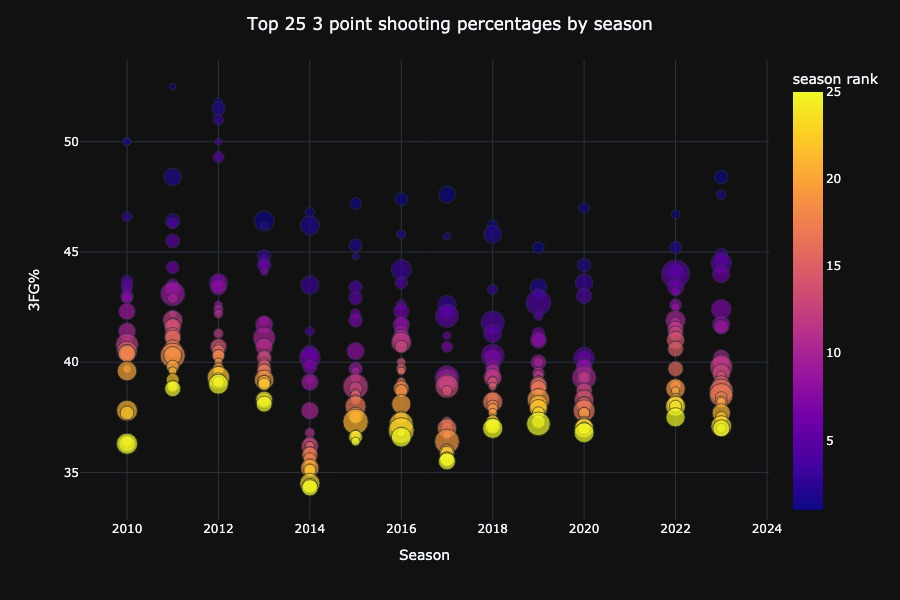

In [9]:
q = """
    SELECT season, fga3, fg3_percent, season_rank
    FROM (  SELECT player_shooting.*,
                row_number() OVER (PARTITION BY season ORDER BY fg3_percent DESC) AS season_rank
            FROM player_shooting 
            NATURAL JOIN player_info
            WHERE games_played > 10 AND fgm3 >= 1
          ) player_shooting
    WHERE season_rank >= 1 AND season_rank <= 25
"""


result = read_query(connection, q, None)
df = pd.DataFrame(result, columns=['Season', '3fga', '3fg%', 'season rank'])


fig = px.scatter(df, 'Season', '3fg%', size=df['3fga']**2, color='season rank')
fig.update_layout(template="plotly_dark",
                  width=900,
                  height=600,
                  title='Top 25 3 point shooting percentages by season',
                  xaxis_title='Season',
                  yaxis_title='3FG%',
                  title_x=0.5)
fig.show('jpg')

#save Figure as jpg image
fig.write_image("images/ind_top25_3fg_pct_by_season.jpeg", scale=6)


Key take aways from above:
- 2010 - 2012 contain the highest percentages, but mainly achieved on fewer attempts per game (smaller dot sizes)
- 2014 - poor shooting season, top 10 vary between ~47% and ~38%, only season to have those shooting below 35% make the top 25
- comparing 2022 and 2023 to 2012, more of the top shooters are taking more attempts
- number of players shooting > 40% from three decreased between 2014 and 2020 (with the exception of 2016) but increased in 2022


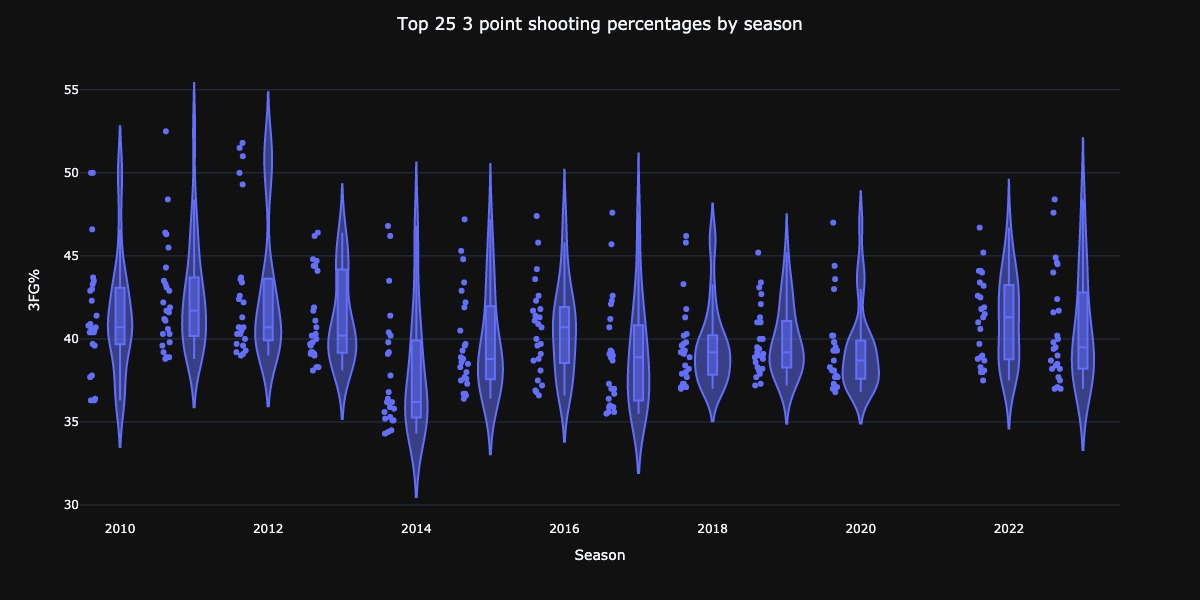

In [10]:
fig = px.violin(df, x="Season", y="3fg%", box=True, points="all",
          hover_data=df.columns)
fig.update_layout(template="plotly_dark",
                  width=1200,
                  height=600,
                  title='Top 25 3 point shooting percentages by season',
                  xaxis_title='Season',
                  yaxis_title='3FG%',
                  title_x=0.5)
fig.show('jpg')

#save Figure as jpg image
fig.write_image("images/ind_top25_3fg_pct_by_season_violin.jpeg", scale=6)

### Individual Scoring Averages
- look at what percentage of players have averaged between X and Y points in a season (having played >10 games)
- each player/season record/instance is a separate instance 

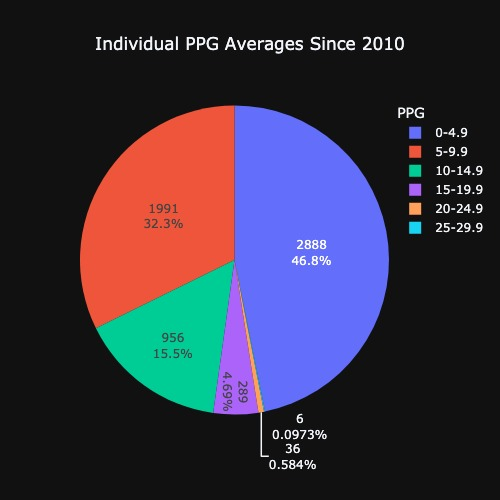

[(6166,)]


In [11]:
pts = [0, 5, 10, 15, 20, 25, 30]
df = pd.DataFrame()

for idx in range(0,len(pts)-1):
    lower_bound = pts[idx]
    upper_bound = pts[idx+1]
    
    q = """
        SELECT count(player_id)
        FROM player_shooting
        NATURAL JOIN player_info
        WHERE ppg >= %s AND ppg < %s AND games_played > 10 
        """
    result = read_query(connection, q,[lower_bound, upper_bound])
    
    df[lower_bound] = result[0]
     
#count total number of players since 2010 who played in at least 10 games
q2 = """
    SELECT count(player_id)
    FROM player_info
    WHERE games_played > 10
    ;
    """

num_players_total = read_query(connection, q2, None)

labels = ['0-4.9','5-9.9','10-14.9','15-19.9', '20-24.9', '25-29.9']
plot = px.pie(df, values=df.iloc[0], names=labels, title="Individual PPG Averages Since 2010")
plot.update_traces(textinfo='percent+value')
plot.update_layout(width=500, template="plotly_dark", title_x=0.5, legend=dict(title="PPG"))
plot.show('jpg')

#save Figure as jpg image
plot.write_image("images/ppg_ave_piechart.jpeg", scale=6)

print(num_players_total)

### Plot highest PPG per season and the player who achieved it

In [12]:
#get highest average for a stat for each season for players playing more than 10 games
q = """
    SELECT max(ppg), player_shooting.season
    FROM players 
    JOIN player_shooting 
    ON players.player_id = player_shooting.player_id
    JOIN player_info
    ON player_shooting.player_id = player_info.player_id AND
       player_shooting.season = player_info.season
    WHERE games_played > 10
    GROUP BY player_shooting.season
    ORDER BY player_shooting.season
    """
result = read_query(connection, q, None)
result
df = pd.DataFrame(result)

# find the player who recorded highest average for a stat for each season (who played more than 10 games)
top_scorers_df = pd.DataFrame(columns=['Player', 'PPG', 'Season'])

g_played = 10
for t in result:
    t_ppg = t[0]-0.1
    t_season = t[1]
    vars = [t_ppg, t_season, g_played]

    q = """
        SELECT name, ppg, player_shooting.season
        FROM players 
        JOIN player_shooting 
        ON players.player_id = player_shooting.player_id
        JOIN player_info
        ON player_shooting.player_id = player_info.player_id AND
           player_shooting.season = player_info.season
        WHERE ppg > %s AND player_shooting.season = %s AND games_played > %s
        ORDER BY player_shooting.season;
        """
    query_result = read_query(connection, q, vars)
    result_list = [query_result[0][0], query_result[0][1], query_result[0][2]]
    result_df= pd.DataFrame([result_list], columns=['Player', 'PPG', 'Season'])
    top_scorers_df = pd.concat([top_scorers_df, result_df], axis=0, ignore_index=True)

top_scorers_df

Empty DataFrame
Columns: [Player, PPG, Season]
Index: []


,Player,PPG,Season
0,Kelsey Hodgson,22.1,2010
1,Justine Colley,25.8,2011
2,Justine Colley,24.4,2012
3,Justine Colley,28.3,2013
4,Cassie Cooke,23.6,2014
5,Jylisa Williams,28.8,2015
6,Lindsay Lessard,20.8,2016
7,Paloma Anderson,22.8,2017
8,Antoinette Miller,25.9,2018
9,Hannah Brown,26.4,2019


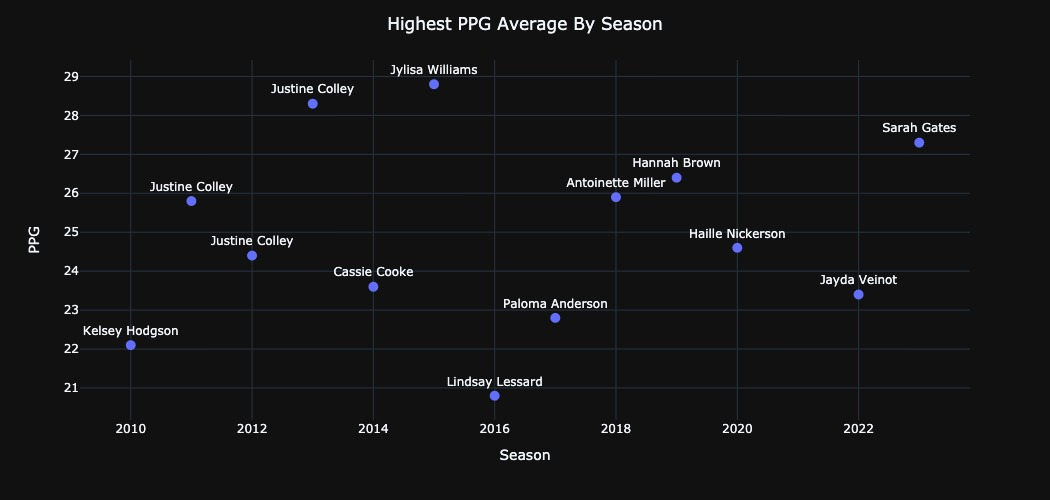

In [13]:
fig = px.scatter(top_scorers_df, x="Season", y="PPG", text="Player")
fig.update_traces(textposition='top center',  textfont_size=12, marker=dict(size=10))
fig.update_layout(
    width=1050,
    height=500,
    title_text='Highest PPG Average By Season',
    template='plotly_dark',
    title_x=0.5
)
fig.show('jpg')

#save Figure as jpg image
fig.write_image("images/highest_ppg_per_season.jpeg", scale=6)

### Plot top 15 PPG averages (>10 games played) since 2010 season

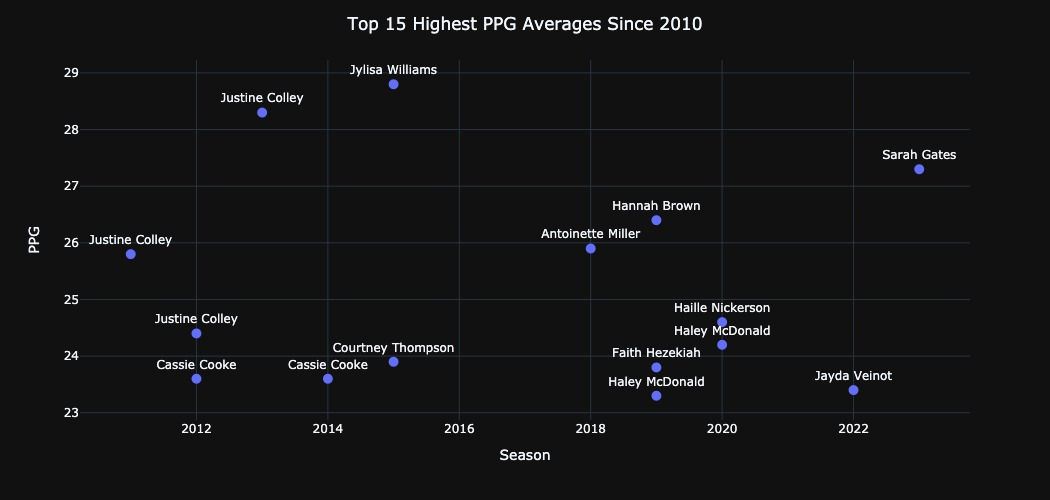

In [20]:
#get highest average PPG for players playing more than 10 games
q = """
SELECT season, ppg, name
FROM players
NATURAL JOIN player_shooting
NATURAL JOIN player_info
WHERE games_played > 10
ORDER BY ppg DESC
LIMIT 15
"""
result = read_query(connection, q, None)
result
df = pd.DataFrame(result, columns=['Season', 'PPG', 'Player'])

fig = px.scatter(df, x="Season", y="PPG", text="Player")
fig.update_traces(textposition='top center',  textfont_size=12, marker=dict(size=10))
fig.update_layout(
    width=1050,
    height=500,
    title_text='Top 15 Highest PPG Averages Since 2010',
    template='plotly_dark',
    title_x=0.5
)
fig.show('jpg')

#save Figure as jpg image
fig.write_image("images/top_15_ppg_averages.jpeg", scale=6)


### Plot the top 15 PPG along with their FG% to compare efficiency

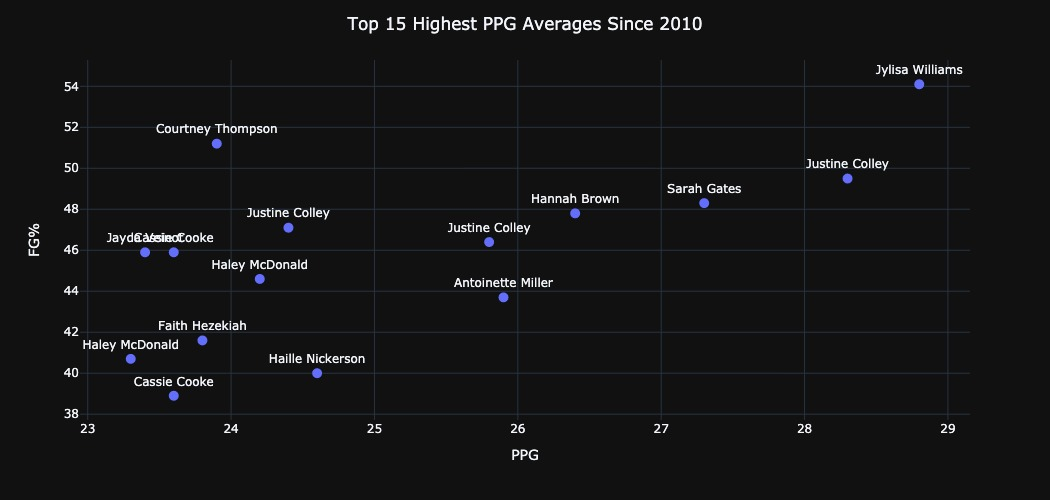

In [24]:
#get 15 highest average PPG and their FG% for players playing more than 10 games
q = """
SELECT season, ppg, fg_percent, name
FROM players
NATURAL JOIN player_shooting
NATURAL JOIN player_info
WHERE games_played > 10
ORDER BY ppg DESC
LIMIT 15
"""
result = read_query(connection, q, None)
result
df = pd.DataFrame(result, columns=['Season', 'PPG', 'FG%', 'Player'])

fig = px.scatter(df, x="PPG", y="FG%", text="Player")
fig.update_traces(textposition='top center',  textfont_size=12, marker=dict(size=10))
fig.update_layout(
    width=1050,
    height=500,
    title_text='Top 15 Highest PPG Averages Since 2010',
    template='plotly_dark',
    title_x=0.5
)
fig.show('jpg')

#save Figure as jpg image
fig.write_image("images/top_15_ppg_fg_percent.jpeg", scale=6)
